In [19]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from scipy import optimize
import math

In [20]:
f = open('ASTR19_S22_group_project_data.txt', "r") # Open file to be read
f.readline() # Read past the first three lines bc they contain comments
f.readline()
f.readline()

arr_day=[]
arr_time=[]
arr_tide=[]
for i in f:
    split_up=i.split()
    arr_day.append(int(split_up[0]))
    arr_time.append(split_up[1])
    arr_tide.append(float(split_up[2]))

arr_mins = []
for s in range(len(arr_time)): # turn HH:MM & day into days as float
    hr_min = arr_time[s].split(":")
    arr_mins.append(((int(hr_min[0]) / 24) + int(hr_min[1]) / (60*24)) + arr_day[s])
arr_mins = np.array(arr_mins)
arr_tide = np.array(arr_tide)

[-2.16033659e+02  2.81737951e+02 -5.70142088e+01  2.56633497e+00
 -2.23107926e+00 -1.47224452e+03 -1.61872724e+03  2.94371865e+03]


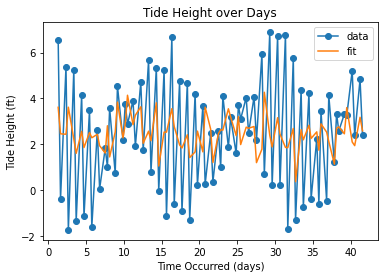

In [21]:
def graph_optimize(x, a, b, c, d, e, f, g, h): # time is type int
    return (e * np.sin(a*x+f) * np.sin(b*x+g) * np.sin(c*x+h) + d)

popt, pcov = optimize.curve_fit(graph_optimize, arr_mins, arr_tide) #fit
a, b, c, d, e, f, g, h = popt # split param values, all parts of sine function
print(popt)

y_line = graph_optimize(arr_mins, a, b, c, d, e, f, g, h)  # calculate output made by best fit

# create a line plot for the mapping function
plt.plot(arr_mins, arr_tide, 'o-', label='data')
plt.plot(arr_mins, y_line, '-', label='fit')
plt.legend()
plt.xlabel("Time Occurred (days)")
plt.ylabel("Tide Height (ft)")
plt.title("Tide Height over Days")
plt.savefig("data_with_best_fit.pdf")

Text(0.5, 1.0, 'Tide Height over Days with Residuals')

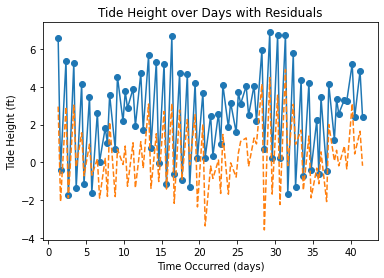

In [22]:
plt.plot(arr_mins, arr_tide, 'o-', label='data')
plt.plot(arr_mins, abs(arr_tide) - abs(y_line), '--', label='residual')
plt.xlabel("Time Occurred (days)")
plt.ylabel("Tide Height (ft)")
plt.title("Tide Height over Days with Residuals")

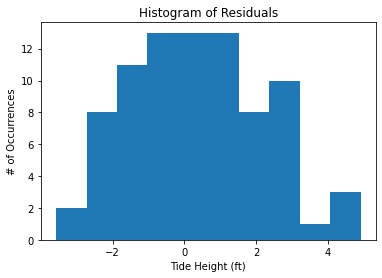

Standard Deviation:  1.8571113206323682


In [23]:
# histogram
residual = abs(arr_tide) - abs(y_line)
plt.hist(residual, bins=10)
plt.xlabel("Tide Height (ft)")
plt.ylabel("# of Occurrences")
plt.title("Histogram of Residuals")
plt.savefig("histogram_of_residuals.pdf") # save the figure as a PDF
plt.show()
std_div = np.std(residual)
print("Standard Deviation: ", std_div)

Tsunami is  3.517587559019525  deviations away


Text(0.5, 1.0, 'Tide Height over Days with Outlier')

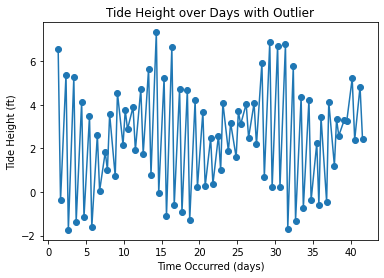

In [24]:
mean = np.mean(residual)
tsunami = max(residual)+2
deviations = (tsunami-mean)/std_div
print("Tsunami is ", deviations," deviations away")

# plotting the outlier
arr_tide_outlier = np.copy(arr_tide)
arr_tide_outlier[26] += 2
plt.plot(arr_mins, arr_tide_outlier, 'o-')
plt.xlabel("Time Occurred (days)")
plt.ylabel("Tide Height (ft)")
plt.title("Tide Height over Days with Outlier")